# Series de Taylor y ecuaciones en el problema de la gota dieléctrica
En este notebook vemos cómo calcular series de Taylor usando SymPy, y como resolver ecuaciones algebraicas sencillas. Ilustramos el cálculo con las funciones y ecuaciones que necesitamos aproximar o resolver en el problema de la gota esférica dieléctrica en presencia de un campo eléctrico uniforme. Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

In [2]:
# Definimos variables simbólicas
e,epsilon,gamma,R,E0 = symbols("e epsilon gamma R E_0", real=True)

## Cálculo de series de Taylor
El comando "series" de Sympy nos permite calcular series de Taylor para alguna variable, alrededor de un punto x0, y hasta algún orden prefijado. Mas detalles de este comando se encuentran en https://docs.sympy.org/latest/tutorial/calculus.html#series-expansion.

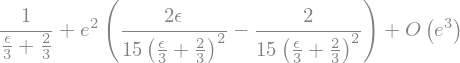

In [3]:
# Expandimos una función en serie de Taylor en potencias de e, alrededor del 0, y hasta tercer orden. El comando "Rational" preserva la fracción en forma racional:
series(1/(1+(Rational('1/3')-Rational('2/15')*e**2)*(epsilon-1)),e,0,3)

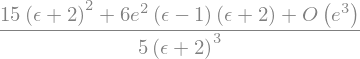

In [4]:
# Ahora podemos simplificar el resultado y volver a escribir en términos de potencias de e
collect(simplify(_),e)

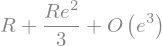

In [5]:
# Veamos otro desarrollo en serie de Taylor
series(R*(1-e**2)**Rational('-1/3'),e,0,3)

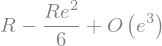

In [6]:
# Y el desarrollo restante que aparece en la cuenta de la gota dieléctrica:
series(R*(1-e**2)**Rational('1/6'),e,0,3)

## Solución simbólica de ecuaciones algebraicas
Para resolver ecuaciones algebraicas usamos el comando "solve" en SymPy (https://docs.sympy.org/latest/modules/solvers/solvers.html). Este comando resuelve una ecuación igualada a cero.

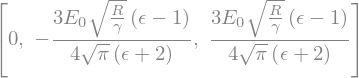

In [7]:
# Resolvemos la ecuación para el extremo de la energía libre, para la variable e
solve(Rational('32/45')*gamma*pi*R**2*e**3 - Rational('6/15')*R**3*((epsilon-1)/(epsilon+2))**2*E0**2*e, e)